### 1. Load Dataset


In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/home/santanu/code/sjchem/bank-account-fraud-detection/raw_data/Base.csv')


In [7]:
df.head

<bound method NDFrame.head of         fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                         -1   
1                0     0.8               0.617426                         -1   
2                0     0.8               0.996707                          9   
3                0     0.6               0.475100                         11   
4                0     0.9               0.842307                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                         -1   
999996           0     0.9               0.824544                         -1   
999997           0     0.8               0.140891                         -1   
999998           0     0.9               0.002480                         52   
999999           0     0.6               0.993391                         -1   

        c

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

The dataset has no missing value. There are few object column, these needs tobe change numaric. Also need to check the column value before transform them. It will help what kind of information is there.

In [8]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: payment_type
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64


Column: employment_status
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64


Column: housing_status
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64


Column: source
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64


Column: device_os
device_os
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: count, dtype: int64




In [9]:
# transform object to integer
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category').cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  int8   
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

### EDA & Fraud Intuition Checks

#### 1. Fraud rate

In [17]:
# Fraud rate
df['fraud_bool'].value_counts(normalize=True)

fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64

The data is highly imbalance, and it supposed to be so, ~1.1 % quite enough in total data set. Need to check all distribution in data set

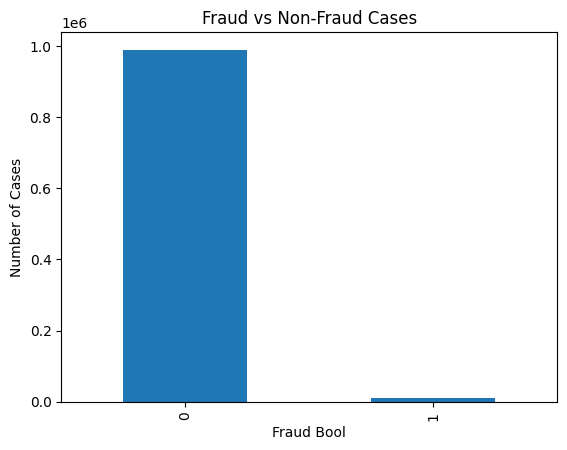

In [16]:
# Fraud rate
df['fraud_bool'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Cases')
plt.xlabel('Fraud Bool')
plt.ylabel('Number of Cases')
plt.show()

#### 2. Univariate Checks (Fraud vs Non-Fraud)

In [ ]:
# Income distribution by fraud status
df.groupby('fraud_bool')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,0.561313,0.290309,0.1,0.3,0.6,0.8,0.9
1,11029.0,0.686635,0.265579,0.1,0.6,0.8,0.9,0.9


From here the Legitimate accounts - mean income ia 0.56 while fradulent acoounts mean income is 0.69 whic is ~22% higher than. It males sense as they are likely inflating this to to get higer credit limit.

In [23]:
#age distribution by fraud status
df.groupby('fraud_bool')['customer_age'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,33.609125,11.989302,10.0,20.0,30.0,40.0,90.0
1,11029.0,40.858645,13.086334,10.0,30.0,40.0,50.0,90.0


Fradulant mean age 40, it supposed to be, as they looks financially mature: stable income, credit eligibility.

/tmp/ipykernel_32925/1576651685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = df.groupby('age_bucket')['fraud_bool'].mean()


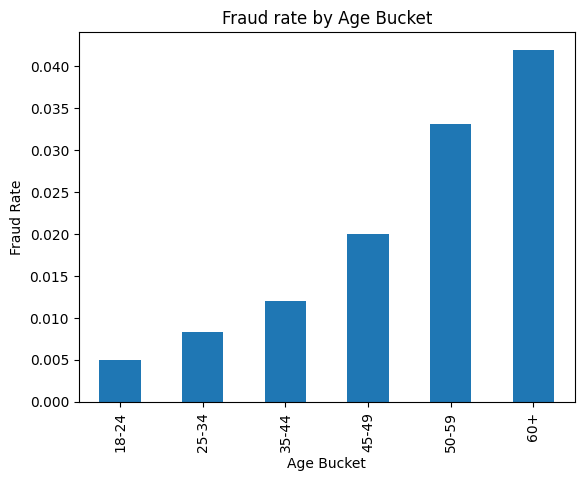

In [ ]:
#Plot Fraud Rate by Age Bucket
df ['age_bucket'] = pd.cut(
    df['customer_age'], bins=[18, 25, 35, 45, 50, 60, 100],
    labels=['18-24', '25-34', '35-44', '45-49', '50-59', '60+']
)
age_fraud = df.groupby('age_bucket')['fraud_bool'].mean()
age_fraud.plot(kind='bar')
plt.title('Fraud rate by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Fraud Rate')
plt.show()

In [24]:
# Credit Risk Score distribution by fraud status
df.groupby('fraud_bool')['credit_risk_score'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,,,,,,,,
0,988971.0,130.469904,69.357052,-170.0,83.0,122.0,177.0,389.0
1,11029.0,177.590353,81.910348,-97.0,112.0,178.0,240.0,378.0


In [33]:
df[df['customer_age'] > 35].groupby('fraud_bool')['credit_risk_score'].mean()

fraud_bool
0    142.550000
1    188.120793
Name: credit_risk_score, dtype: float64

In [36]:
df.groupby('fraud_bool')['proposed_credit_limit'].median()
# df.groupby('fraud_bool')['proposed_credit_limit'].describe()

fraud_bool
0    200.0
1    500.0
Name: proposed_credit_limit, dtype: float64

#### 3. Binary Feature Sanity checks

In [40]:
# Free eamils
df.groupby('email_is_free')['fraud_bool'].mean()

email_is_free
0    0.007951
1    0.013760
Name: fraud_bool, dtype: float64

In [ ]:
# Foreign requests
df.groupby('foreign_request')['fraud_bool'].mean()


foreign_request
0    0.010745
1    0.021987
Name: fraud_bool, dtype: float64

In [43]:
# Phone Validity
df.groupby('phone_mobile_valid')['fraud_bool'].mean()

phone_mobile_valid
0    0.014938
1    0.010544
Name: fraud_bool, dtype: float64

From all three features suggest 1. Free email -> higher fraud rate, 2. Foreign request =1 -> almost double in the case of fraud and in last phonevalid case invalid phone -> higher fraud rate.

#### 4. Velocity Feature
which is one of the most important feature in fraude detection